# Contents

#### 1. Importing Libraries and Data
#### 2. Exploring Correlations - State Level, Cases and Deaths
* Correlations
* Correlation Heat Map
* Scatterplots - Stay at Home Orders, Mask Mandates
* Pair Plots
* Categorical Plots - COVID Deaths, COVID Cases
* Creating Categories Based on Category Plots

#### 3. Exploring Correlations - County Level, Cases Per 100K

#### 4. Research Questions and Hypotheses

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensures charts are displayed in notebook 
%matplotlib inline

In [3]:
# Create file path
path = r'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data'

In [4]:
path

'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data'

### State level data - cases, deaths, avg per 100K, counts of home and mask mandates

In [5]:
# Import state level data - mask mandates, COVID cases and deaths
df = pd.read_csv(os.path.join(path, 'COVID_death_case_mandate_by_state.csv'))

In [6]:
df.head()

,Unnamed: 0,date,state,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths,State
0,0,2020-04-10,Alabama,67.0,NaN,NaN,NaN,67.0,49.177000,3103,158,141,12,Alabama
1,1,2020-04-10,Alaska,29.0,NaN,NaN,NaN,29.0,2.027000,246,11,9,0,Alaska
2,2,2020-04-10,Arizona,15.0,NaN,NaN,NaN,15.0,31.366800,3112,94,97,8,Arizona
3,3,2020-04-10,Arkansas,NaN,75.0,NaN,NaN,75.0,23.702227,1202,75,24,3,Arkansas
4,4,2020-04-10,California,58.0,NaN,NaN,NaN,58.0,11.686698,19472,1163,541,49,California


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            12648 non-null  int64  
 1   date                  12648 non-null  object 
 2   state                 12648 non-null  object 
 3   home_yes_count        1987 non-null   float64
 4   home_no_count         4882 non-null   float64
 5   home_recommend_count  6370 non-null   float64
 6   yes_mask_count        6666 non-null   float64
 7   no_mask_count         6102 non-null   float64
 8   avg_per_100K          12648 non-null  float64
 9   Total Cases           12648 non-null  int64  
 10  New Cases             12648 non-null  int64  
 11  Total Deaths          12648 non-null  int64  
 12  New Deaths            12648 non-null  int64  
 13  State                 12648 non-null  object 
dtypes: float64(6), int64(5), object(3)
memory usage: 1.4+ MB


### County level data - order codes and cases per 100K

In [8]:
# Import county level data - cases per 100K
df_2 = pd.read_csv(os.path.join(path, 'COVID_state_mask_100K.csv'))

In [9]:
df_2.head()

,Unnamed: 0,state_abbreviated,County_Name,FIPS_State,FIPS_County,date,order_code_home,Stay_at_Home_Order_Recommendation,order_code_mask,Face_Masks_Required_in_Public,home_order,state,fips_code,cases_per_100K,community_transmission_level
0,0,AL,Autauga County,1,1,2020-04-10,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
1,1,AL,Autauga County,1,1,2020-04-11,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
2,2,AL,Autauga County,1,1,2020-04-12,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
3,3,AL,Autauga County,1,1,2020-04-13,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
4,4,AL,Autauga County,1,1,2020-04-14,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,19.689,substantial


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769296 entries, 0 to 769295
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         769296 non-null  int64  
 1   state_abbreviated                  769296 non-null  object 
 2   County_Name                        769296 non-null  object 
 3   FIPS_State                         769296 non-null  int64  
 4   FIPS_County                        769296 non-null  int64  
 5   date                               769296 non-null  object 
 6   order_code_home                    769296 non-null  int64  
 7   Stay_at_Home_Order_Recommendation  769296 non-null  object 
 8   order_code_mask                    769296 non-null  int64  
 9   Face_Masks_Required_in_Public      769296 non-null  object 
 10  home_order                         769296 non-null  object 
 11  state                              7692

## 2. Exploring Correlations - State Level, Cases and Deaths

In [11]:
# Create a correlation matrix using pandas
df.corr()

,Unnamed: 0,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths
Unnamed: 0,1.000000,0.298973,-0.017067,-0.020571,0.123311,-0.020170,0.643936,0.444716,0.361401,0.327785,0.031707
home_yes_count,0.298973,1.000000,0.056662,-0.224164,0.863802,0.946806,0.295486,0.323608,0.139385,0.245224,0.076619
home_no_count,-0.017067,0.056662,1.000000,0.136650,0.967409,0.915283,0.166727,0.144111,0.141336,-0.042811,0.092536
home_recommend_count,-0.020571,-0.224164,0.136650,1.000000,0.993203,0.977221,0.193780,0.450442,0.419673,0.431840,0.436028
yes_mask_count,0.123311,0.863802,0.967409,0.993203,1.000000,-0.490933,0.238881,0.545614,0.451493,0.383005,0.404197
no_mask_count,-0.020170,0.946806,0.915283,0.977221,-0.490933,1.000000,0.038197,0.173444,0.233059,0.172162,0.178412
avg_per_100K,0.643936,0.295486,0.166727,0.193780,0.238881,0.038197,1.000000,0.349561,0.491409,0.150281,0.241154
Total Cases,0.444716,0.323608,0.144111,0.450442,0.545614,0.173444,0.349561,1.000000,0.775387,0.859249,0.523556
New Cases,0.361401,0.139385,0.141336,0.419673,0.451493,0.233059,0.491409,0.775387,1.000000,0.584514,0.604218
Total Deaths,0.327785,0.245224,-0.042811,0.431840,0.383005,0.172162,0.150281,0.859249,0.584514,1.000000,0.467766


In [13]:
# Create a subset excluding un-needed Columns
sub = df[['home_yes_count', 'home_no_count', 'home_recommend_count', 'yes_mask_count','no_mask_count','avg_per_100K','New Cases','New Deaths','Total Deaths','Total Cases']]

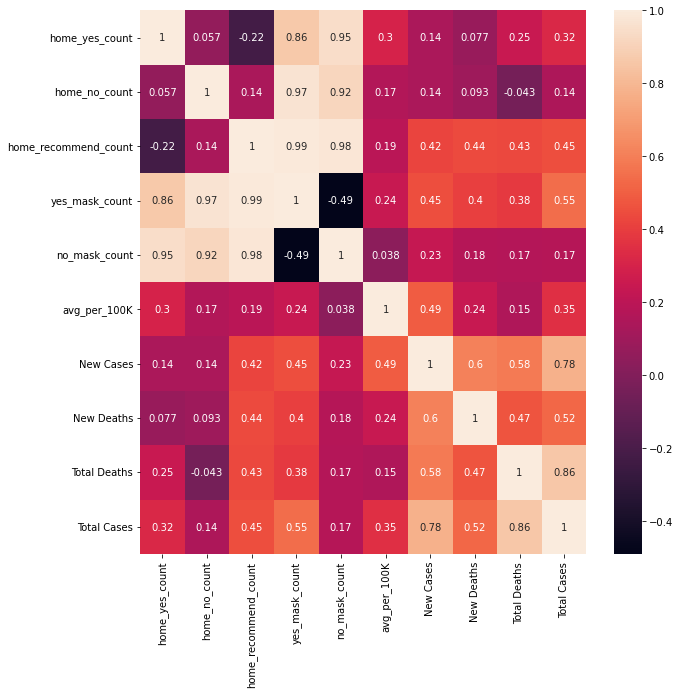

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

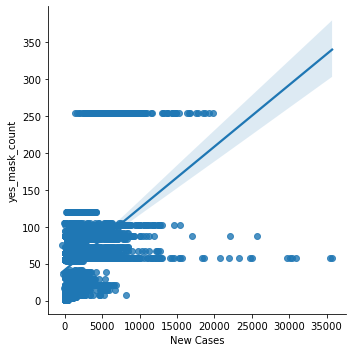

In [18]:
# Create a scatterplot for stay a home orders and new cases of COVID
sns.lmplot(x = 'New Cases', y = 'yes_mask_count', data = df)

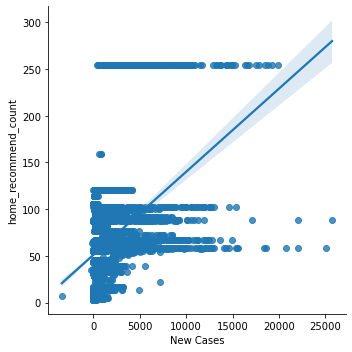

In [19]:
# Create a scatterplot for stay a home orders and new COVID deaths
sns.lmplot(x = 'New Cases', y = 'home_recommend_count', data = df)

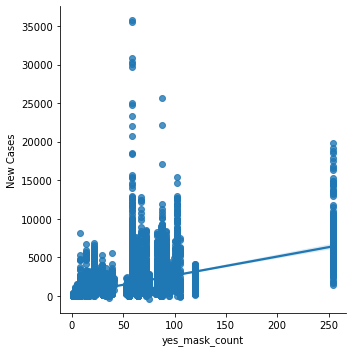

In [20]:
# Create a scatterplot for mask mandaates and new cases of COVID
sns.lmplot(x = 'yes_mask_count', y = 'New Cases', data = df)

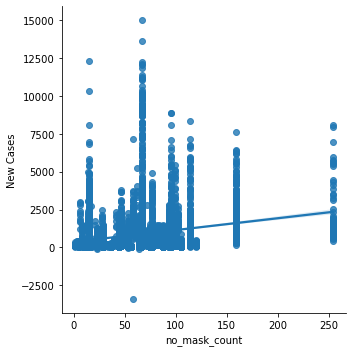

In [21]:
# Create a scatterplot for stay a home orders and new cases of COVID
sns.lmplot(x = 'no_mask_count', y = 'New Cases', data = df)

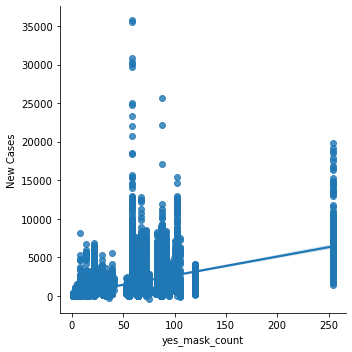

In [22]:
# Create a scatterplot for stay a home orders and new cases of COVID
sns.lmplot(x = 'yes_mask_count', y = 'New Cases', data = df)

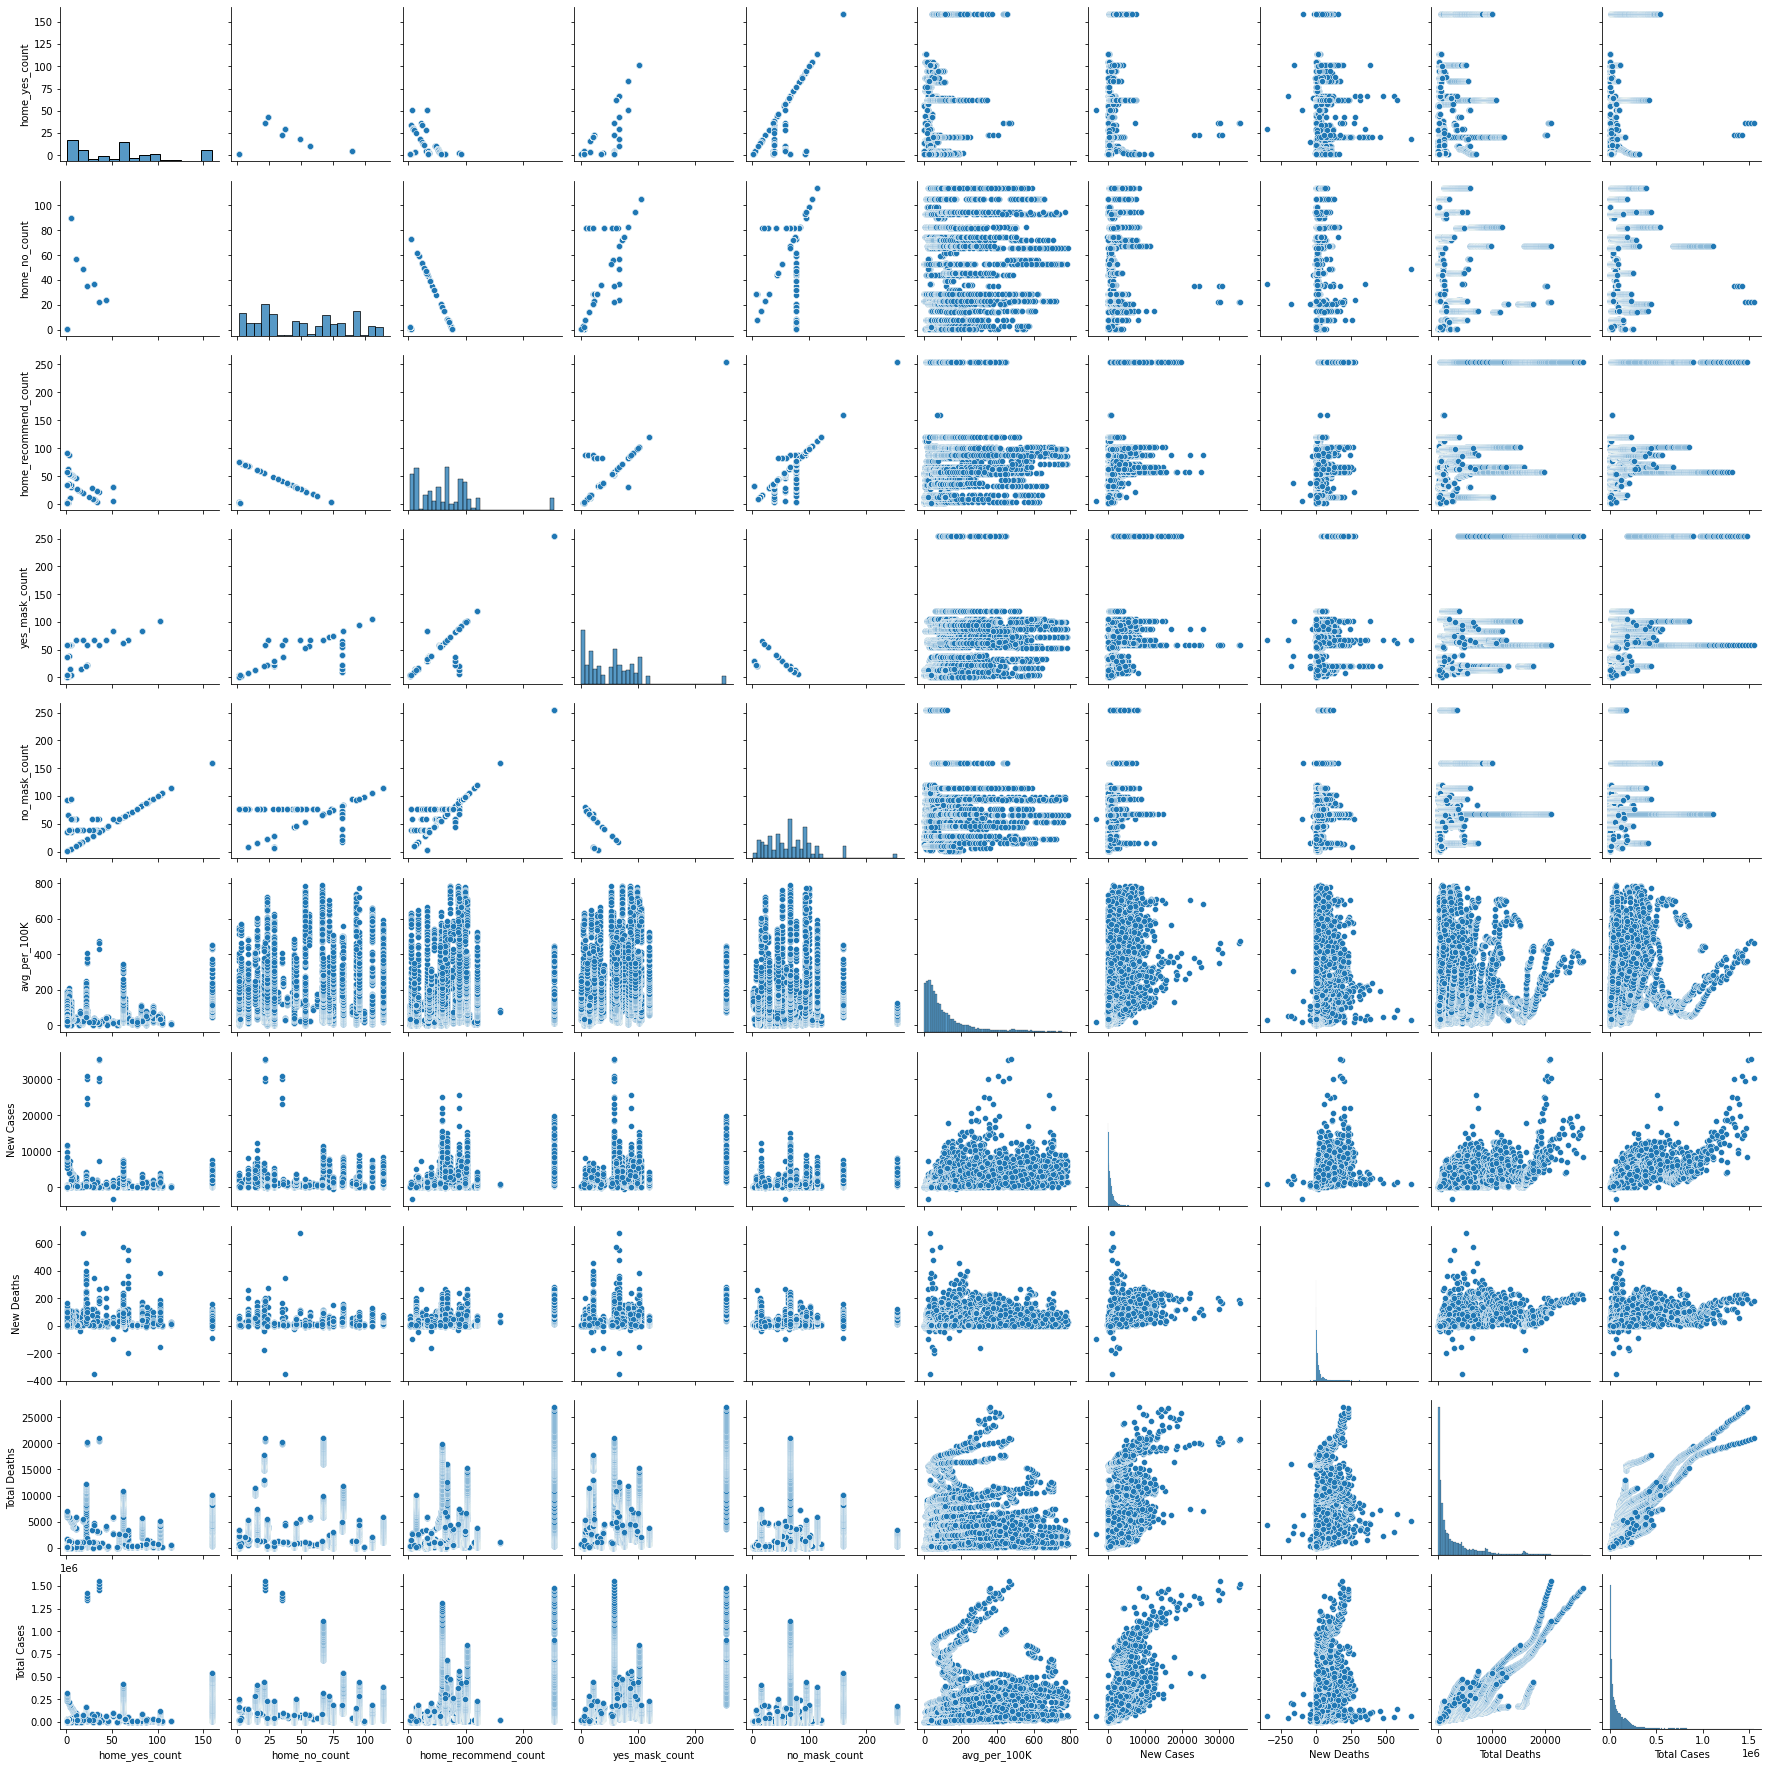

In [23]:
# Create a pair plot 
g = sns.pairplot(sub)

In [24]:
CrosstabResult=pd.crosstab(index=df['New Cases'],columns=df['home_yes_count'])
print(CrosstabResult)

home_yes_count  1.0    2.0    3.0    4.0    5.0    6.0    7.0    10.0   11.0   \
New Cases                                                                       
-3401               0      0      0      0      0      0      0      0      0   
-293                1      0      0      0      0      0      0      0      0   
-4                  0      0      0      0      0      0      0      0      0   
-1                  0      0      0      0      0      0      0      0      0   
 0                  0      0      0      0     12      0      0      0      0   
...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
 30075              0      0      0      0      0      0      0      0      0   
 30334              0      0      0      0      0      0      0      0      0   
 30851              0      0      0      0      0      0      0      0      0   
 35468              0      0      0      0      0      0      0      0      0   
 35729              0      0

In [25]:
 # Perform Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

In [26]:
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.8744457498160948


Much like COVID cases, there is a very weak correlation between COVID deaths and stay at home orders - and in the case of new deaths it is actually a negative correlation. Again, in this case it is because the independent variable (prescence of a stay at home or mask order) is categorical.

It is really interesting to look at mask orders and COVID death and case data. In all cases, there is a positive correlation between 1 (yes a mask order) and cases. This is not unsurprising when taken in context. Often mask orders are put into place because numbers are high on those days. It will be interesting to see if 14 days after the mandates (the average incubation period for COVID) if there is a difference in the number of cases.

### Categorical Plots:

##### Create categorical variable that splits number of deaths into categories

In [29]:
# Check min and max values of total deaths and cases
df['Total Deaths'].max()

26962

In [30]:
df['Total Deaths'].min()

0

In [31]:
df['Total Cases'].max()

1551766

In [32]:
df['Total Cases'].min()

246

<AxesSubplot:xlabel='Total Deaths', ylabel='Count'>

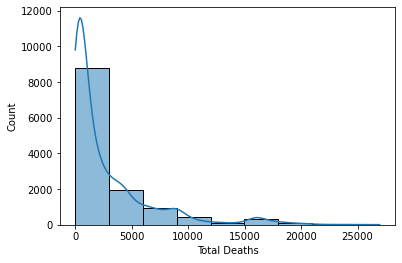

In [34]:
# Histogram to see distribution of total deaths
sns.histplot(df['Total Deaths'], bins = 9, kde = True)

#### Create cateogories based on histograms

In [35]:
# Total death categories and columns
df.loc[df['Total Deaths'] > 17000, 'Death Rate'] = 'High Death Rate'

In [36]:
df.loc[(df['Total Deaths'] <= 17000) & (df['Total Deaths'] > 8000), 'Death Rate'] = 'Middle Death Rate'

In [37]:
df.loc[df['Total Deaths'] <= 8000, 'Death Rate'] = 'Low Death Rate'

In [38]:
df['Death Rate'].value_counts(dropna = False)

Low Death Rate       11345
Middle Death Rate     1103
High Death Rate        200
Name: Death Rate, dtype: int64

In [39]:
#Total cases categories and columns
df.loc[df['Total Cases'] > 500000, 'Case Rate'] = 'High Case Rate'

In [40]:
df.loc[df['Total Cases'] <= 500000, 'Case Rate'] = 'Low Case Rate'

In [41]:
df['Case Rate'].value_counts(dropna = False)

Low Case Rate     12199
High Case Rate      449
Name: Case Rate, dtype: int64

In [42]:
# Check creation of new variables
df.head(10)

,Unnamed: 0,date,state,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths,State,Death Rate,Case Rate
0,0,2020-04-10,Alabama,67.0,NaN,NaN,NaN,67.0,49.177000,3103,158,141,12,Alabama,Low Death Rate,Low Case Rate
1,1,2020-04-10,Alaska,29.0,NaN,NaN,NaN,29.0,2.027000,246,11,9,0,Alaska,Low Death Rate,Low Case Rate
2,2,2020-04-10,Arizona,15.0,NaN,NaN,NaN,15.0,31.366800,3112,94,97,8,Arizona,Low Death Rate,Low Case Rate
3,3,2020-04-10,Arkansas,NaN,75.0,NaN,NaN,75.0,23.702227,1202,75,24,3,Arkansas,Low Death Rate,Low Case Rate
4,4,2020-04-10,California,58.0,NaN,NaN,NaN,58.0,11.686698,19472,1163,541,49,California,Low Death Rate,Low Case Rate
5,5,2020-04-10,Colorado,64.0,NaN,NaN,NaN,64.0,29.503756,6631,368,250,24,Colorado,Low Death Rate,Low Case Rate
6,6,2020-04-10,Connecticut,NaN,8.0,NaN,NaN,8.0,105.994750,10131,347,444,64,Connecticut,Low Death Rate,Low Case Rate
7,7,2020-04-10,Delaware,3.0,NaN,NaN,NaN,3.0,88.897333,1474,154,32,9,Delaware,Low Death Rate,Low Case Rate
8,8,2020-04-10,District of Columbia,1.0,NaN,NaN,NaN,1.0,127.949000,1660,137,38,6,District of Columbia,Low Death Rate,Low Case Rate
9,9,2020-04-10,Florida,67.0,NaN,NaN,NaN,67.0,25.399681,17332,1089,566,40,Florida,Low Death Rate,Low Case Rate


In [43]:
# Export New Dataframe
df.to_csv(os.path.join(path, 'COVID_final_updated.csv'))

#### Categorical Plots based on categories

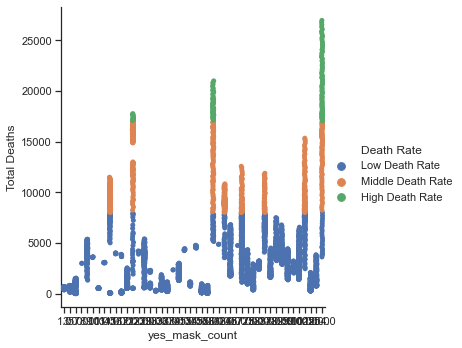

In [45]:
# Create a categorical plot in seaborn using Death Rate categories created above
sns.set(style="ticks")
g = sns.catplot(x="yes_mask_count", y="Total Deaths", hue="Death Rate", data=df)

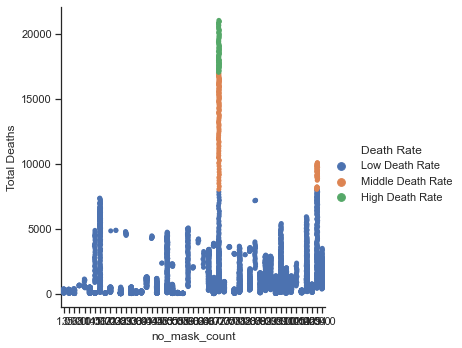

In [46]:
# Create a categorical plot in seaborn using Death Rate categories created above
sns.set(style="ticks")
g = sns.catplot(x="no_mask_count", y="Total Deaths", hue="Death Rate", data=df)

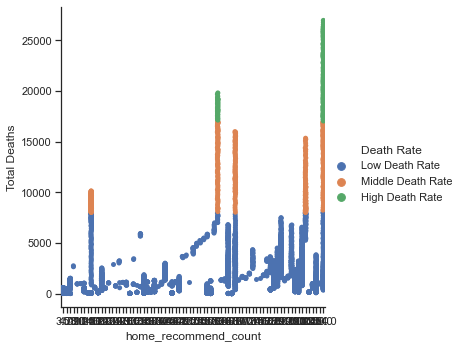

In [48]:
# Create a categorical plot in seaborn using Death Rate categories created above
sns.set(style="ticks")
g = sns.catplot(x="home_recommend_count", y="Total Deaths", hue="Death Rate", data=df)

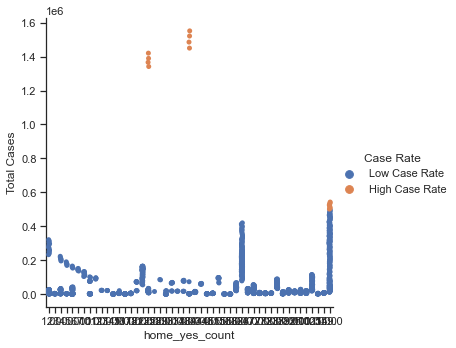

In [49]:
# Create a categorical plot in seaborn using Case Rate categories created above
sns.set(style="ticks")
g = sns.catplot(x="home_yes_count", y="Total Cases", hue="Case Rate", data=df)

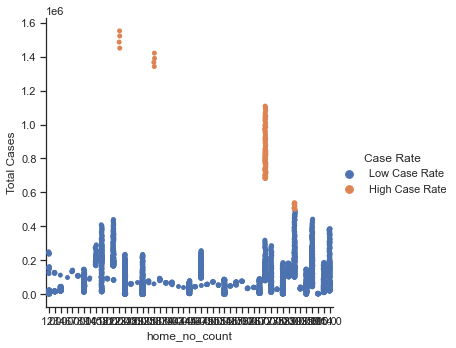

In [50]:
# Create a categorical plot in seaborn using Death Rate categories created above
sns.set(style="ticks")
g = sns.catplot(x="home_no_count", y="Total Cases", hue="Case Rate", data=df)

See the notes above on interpretig these graphs. In the cases of mandates being in place - both masks and stay at home orders - in cases where mandates are in place, that is when the cases are the highest. It is really important to note that the mandates were put into place BECAUSE cases were high. For this dataset, it will be important to account for the COVID incubation period and look at cases 14 days after to account for the effects of the mandates.

#### ANOVA Test

In [52]:
df_2.columns

Index(['Unnamed: 0', 'state_abbreviated', 'County_Name', 'FIPS_State',
       'FIPS_County', 'date', 'order_code_home',
       'Stay_at_Home_Order_Recommendation', 'order_code_mask',
       'Face_Masks_Required_in_Public', 'home_order', 'state', 'fips_code',
       'cases_per_100K', 'community_transmission_level'],
      dtype='object')

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('cases_per_100K ~ C(Stay_at_Home_Order_Recommendation) + C(Face_Masks_Required_in_Public) + C(Stay_at_Home_Order_Recommendation):C(Face_Masks_Required_in_Public)', data=df_2).fit()
sm.stats.anova_lm(model, typ=2)

/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Stay_at_Home_Order_Recommendation),7.433370e+08,5.0,4147.367503,0.0
C(Face_Masks_Required_in_Public),3.430233e+08,1.0,9569.305733,0.0
C(Stay_at_Home_Order_Recommendation):C(Face_Masks_Required_in_Public),4.756632e+08,5.0,2653.910655,0.0
Residual,2.006854e+10,559851.0,NaN,NaN


### 4. Research Questions and Hypotheses

### Research Questions

#### Clarifying Questions
* Do mask and stay at home mandates impact COVID cases and deaths?
* Which states had a higher frequency of mandates? Lowest?
* Which states had the highest number of cases of COVID? Lowest?

#### Funneling Questions
* Are there higher cases of COVID and deaths in states where there are fewer mandates?  
* Is one type of mandate more effective than the other?

#### Ethical Questions
* What are the consequences of reporting on the relationship between mandates and COVID cases/deaths? Could mandates be lowered or minimized, leading to higher COVID risk? Conversely, do increased mandates lead to other issues unrelated to COVID - such as mental health?
* Are there specific privacy laws protecting data collection and storage of medically related data?
* Are there ethical concerns in identifying a state as high risk for COVID? 

### Answers to Questions

According to the scatterplots generated above, stay at home and mask mandates are correlated with higher COVID cases and deaths. This may likely be that because on those days, the cases and deaths were so high, it lead states and counties to implement these policies. Looking at the data in a time series (espeically 14 days after the mandates is crucial). It is also important to add a geographical measure (state or even county level) to this story - do states with mandates have lower cases? At this point, it is only looking at the cases and mandates nationwide, not the geographical component. 

It also calls to question the ethical considerations. Taken out of context - as it is right now - it could lead people to interpret this to mean that these mandates did not work when in fact there is a great deal more to this story. 

The correlation heat map does illustrate the very strong correlation between total cases and total deaths to be very strongly correlated (which seems obvious, but it is good to confirm), so looking at total cases as a predictor of death is helpful for the hypothesis.

### Hypotheses
* Null Hypothesis: The number of COVID cases in a state without mask or stay at home mandates is equal to or less than states with mandates.
* Hypothesis: The number of COVID cases in a state without mask or stay at home mandates is more than states with mandates.